In [103]:
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time

In [104]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Convolution2D, MaxPooling2D, Dropout, Flatten, Dense # Import layers that will be used in modeling

import warnings
warnings.filterwarnings("ignore")

In [105]:


# 2. Our constants
# 2.1 Dimensions to which our images will be adjusted
img_width, img_height = 120, 120       # koi image choti yaa bdhi hoti hai, so we are giving the size so saari image uniform ho jayengi

# 2.2 Data folder containing all training images, maybe in folders: cats and dogs

train_data_dir = 'D:\\chest_xray\\train'
test_data_dir =  'D:\\chest_xray\\test'


# 2.4 Data folder containing all validation images

validation_data_dir = 'D:\\chest_xray\\val'


# Some hyperparameters

# 2.6 Batch size to train at one go:
batch_size = 16             # No of batches = 2000/125 = 32    # Error propagation is easy with smaller batch size
                            # So per epoch we have 16 batches  # Batch-wise error nikalta hai aur adds up all error.

# 2.7 How many epochs of training?
epochs = 5                  # For lack of time, let us make it just 5.


# 2.9 For test data, what should be batch size
test_batch_size = 45    # This is different from training batch size

# 2.10
input_shape = (img_width, img_height, 3)


In [106]:

model = Sequential()

In [107]:
# 4.1 Add Input layer
model.add(Input(shape = input_shape ))

In [108]:
# 4.2 Add Conv2D layer
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),       
    strides = (2,2),           
            padding='same',           
             activation='relu'
           )
         )

In [109]:
model.add(MaxPool2D())

In [110]:
model.add(Conv2D(
    filters=32,               
    kernel_size=(3, 3),        
    activation='relu'
             )
         )

In [111]:
model.add(MaxPool2D())

In [112]:
model.add(Conv2D(
    filters=32,                
         kernel_size=(3, 3),        
          activation='relu'
)
         )

In [113]:
model.add(MaxPool2D())

In [114]:
model.add(Flatten())

In [115]:
model.add(Dense(180,activation = 'relu'))

In [116]:
model.add(Dropout(rate=0.5))

In [117]:
model.add(Dense(256,activation = 'relu'))

In [118]:
model.add(Dropout(rate=0.2))

In [119]:
model.add(Dense(1, activation='sigmoid'))

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

In [121]:
model.compile(
              loss='binary_crossentropy',  
              optimizer='adam',         
              metrics=['accuracy'])        


In [122]:
tr_dtgen = ImageDataGenerator(

                              rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [123]:

# 5.3 Config2: Create iterator from 'train_datagen'.
#     We use flow() or flow_from_directory() methods to further
#     configure and return an iterator object.
#     See at the end of code: Differences between flow()
#     and flow_from_directory
#     Pl see: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,       # Data folder of cats & dogs
                                               target_size=(img_width, img_height),  # Resize images
                                               batch_size=batch_size,  # Return images in batches
                                               class_mode='binary'   # Output labels will be 1D binary labels
                                                                     # [[1],[0],[0],[1]]
                                                                     # If 'categorical' output labels will be
                                                                     # 2D OneHotEncoded: [[1,0],[0,1],[0,1],[1,0]]
                                                                     # If 'binary' use 'sigmoid' at output
                                                                     # If 'categorical' use softmax at output

                                                )


Found 5216 images belonging to 2 classes.


In [124]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [125]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),   # Resize images
                                                     batch_size=batch_size,    # batch size to augment at a time
                                                     class_mode='binary'  # Return 1D array of class labels
                                                     )

Found 16 images belonging to 2 classes.


In [126]:
start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                            
                              # No of epochs
                              epochs=1,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1
                            
                              )

end = time.time()
(end - start)/60  # 7min

326/326 [==============================] - 54s 161ms/step - loss: 0.4457 - accuracy: 0.7991 - val_loss: 0.7242 - val_accuracy: 0.6875


0.8957088351249695

In [127]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4        # How many batches
                        )


# 7.1.1
result     # ['loss', 'accuracy']

4/4 [==============================] - 0s 7ms/step - loss: 0.7242 - accuracy: 0.6875


[0.7241563200950623, 0.6875]

In [128]:
pred = model.predict(validation_generator, steps = 2)

# 8.1.1
pred[:5]


2/2 [==============================] - 0s 9ms/step


array([[0.96304107],
       [0.64344233],
       [0.9921772 ],
       [0.6672533 ],
       [0.6973272 ]], dtype=float32)

In [129]:

test_dtgen = ImageDataGenerator(rescale=1. / 255)

# 9.0.1 Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [130]:
# 9.0.2 Get iterator
#       and a batch of (images, image_labels)
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 120, 120, 3)

1/1 [==============================] - 0s 78ms/step


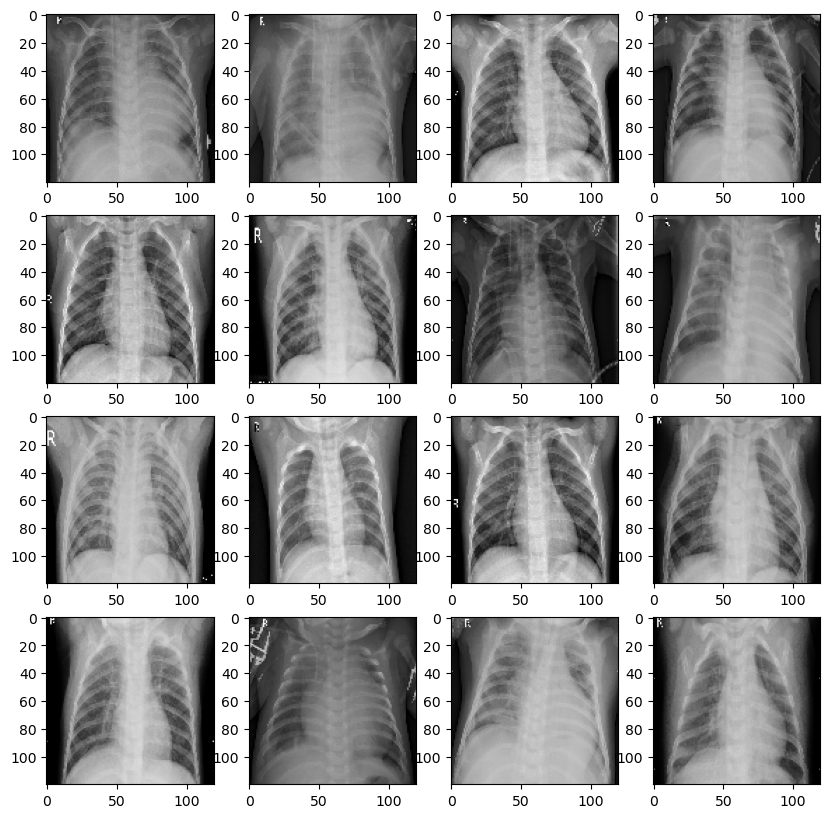

[[0.94964135]
 [0.9861868 ]
 [0.47935307]
 [0.99542385]
 [0.43715164]
 [0.83022296]
 [0.99315923]
 [0.9960789 ]
 [0.8197289 ]
 [0.8432334 ]
 [0.2527906 ]
 [0.9209372 ]
 [0.7074969 ]
 [0.997931  ]
 [0.9472771 ]
 [0.9267759 ]]


In [131]:
results = model.predict(images[0])


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;

print(results)       